## Import & GPU check & Path

In [1]:
import fastai
from fastai.vision import *
from fastai.callback import *
from fastai.vision.gan import GANLearner
from fastai.callbacks import EarlyStoppingCallback
import torch
import pathlib

In [4]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3070 Laptop GPU'

In [5]:
#input
path_lr1 = pathlib.Path('C:/Users/grand/dev/internship2023/IN')
path_lr1

#output
path_hr1 = pathlib.Path('C:/Users/grand/dev/internship2023/OUT')
path_hr1

WindowsPath('C:/Users/grand/dev/internship2023/OUT')

In [6]:
len(os.listdir('C:/Users/grand/dev/internship2023/IN'))

1238

In [7]:
len(os.listdir('C:/Users/grand/dev/internship2023/OUT'))

1238

## Model & Batch size

In [8]:
bs,size = 32,256
arch = models.resnet34

## Prepare data

In [9]:
src = ImageImageList.from_folder(path_lr1).split_by_rand_pct(0.1, seed=42)

In [10]:
print(path_hr1)

C:\Users\grand\dev\internship2023\OUT


In [11]:
def get_data(bs,size):
    data = (src.label_from_func(lambda x: path_hr1/x.name)
           .transform(get_transforms(max_zoom=2.), size=size, tfm_y=True)
           .databunch(bs=bs).normalize(imagenet_stats, do_y=True))

    data.c = 3
    return data

In [12]:
data_gen = get_data(bs,size)

c:\Users\grand\miniconda3\envs\fastai1\lib\site-packages\fastai\vision\transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:760.)
  return _solve_func(B,A)[0][:,0]


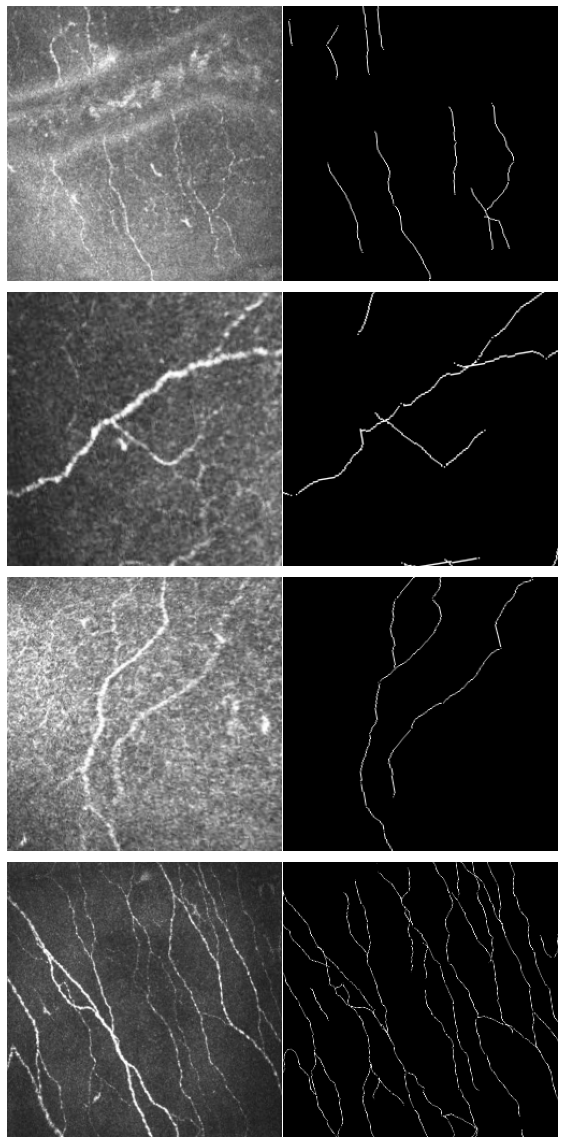

In [ ]:
#data_gen.show_batch(4)

## Create Learner

In [13]:
wd = 1e-3

In [14]:
y_range = (-3.,3.)

In [15]:
loss_gen = MSELossFlat()

In [16]:
def create_gen_learner():
    return unet_learner(data_gen, arch, wd=wd, blur=True, norm_type=NormType.Weight,
                         self_attention=True, y_range=y_range, loss_func=loss_gen)

In [17]:
learn_gen = create_gen_learner()

c:\Users\grand\miniconda3\envs\fastai1\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


## Learning

In [18]:
learn_gen.unfreeze()

In [19]:
learn_gen.data.batch_size = 8
learn_gen.fit_one_cycle(2, pct_start=0.8)

epoch,train_loss,valid_loss,time
0,nan,nan,24:22
1,nan,nan,03:48


In [20]:
print(learn_gen.summary())

DynamicUnet
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 128, 128]       9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 128, 128]       128        True      
______________________________________________________________________
ReLU                 [64, 128, 128]       0          False     
______________________________________________________________________
MaxPool2d            [64, 64, 64]         0          False     
______________________________________________________________________
Conv2d               [64, 64, 64]         36,864     True      
______________________________________________________________________
BatchNorm2d          [64, 64, 64]         128        True      
______________________________________________________________________
ReLU                 [64, 64, 64]         0          False     
__________________________________________________

In [21]:
print(learn_gen.recorder.lrs)


[0.00012, 0.00012014418465588128, 0.00012057670974961656, 0.00012129748866525824, 0.00012230637706216836, 0.00012360317290392026, 0.0001251876164987619, 0.00012705939055161677, 0.00012921812022762772, 0.00013166337322721754, 0.00013439465987266034, 0.0001374114332061433, 0.00014071308909929976, 0.0001442989663741857, 0.00014816834693568955, 0.0001523204559153316, 0.0001567544618264402, 0.000161469476730658, 0.0001664645564157614, 0.00017173870058474284, 0.00017729085305612713, 0.0001831199019754785, 0.00018922468003805797, 0.00019560396472258126, 0.00020225647853603854, 0.00020918088926952108, 0.00021637581026500222, 0.0002238398006930262, 0.00023157136584124475, 0.00023956895741374063, 0.00024783097384108426, 0.00025635576060106064, 0.0002651416105499951, 0.00027418676426462125, 0.00028348941039441815, 0.00029304768602434134, 0.00030285967704788905, 0.000312923418550408, 0.0003232368952025863, 0.00033379804166403177, 0.00034460474299687115, 0.0003556548350892824, 0.0003669461050888672

In [22]:
print(learn_gen.recorder.losses)


[tensor(5.8713), tensor(5.4277), tensor(5.4225), tensor(5.0231), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan), tensor(nan),

## Additional training (optional)

In [ ]:
#learn_gen.lr_find()

In [ ]:
#learn_gen.unfreeze()

In [ ]:
#learn_gen.data.batch_size = 8
#learn_gen.fit_one_cycle(5, slice(2e-5,wd/5))

## Curves

In [ ]:
curve = learn_gen.recorder.plot(return_fig=True)

In [ ]:
curve2 = learn_gen.recorder.plot_losses(return_fig=True)

## Save one plot

In [ ]:
import csv

# Get the Axes object
ax = curve.axes[0]      ##############################CURVE

# Get the Line2D objects (the plotted lines) from the Axes
lines = ax.lines

# Loop through the lines and extract the data
for line in lines:
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    print("x_data:", x_data)
    print("y_data:", y_data)

# Create a list of tuples with the x and y values
data = list(zip(x_data, y_data))

with open('C:/Users/grand/dev/internship2023/recorderPlot.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    # Optionally, you can write a header row
    writer.writerow(['x_data', 'y_data'])

    # Write the data rows
    writer.writerows(data)

## Save two plots

In [ ]:
import csv

# Get the Axes object
ax = curve2.axes[0]          ##############################CURVE2

# Get the Line2D objects (the plotted lines) from the Axes
lines = ax.lines

# Extract the data from the lines
data = []
for line in lines:
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    data.append(list(zip(x_data, y_data)))

# Save the data to a CSV file
with open('C:/Users/grand/dev/internship2023/recorderPlotLosses3.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    # Write a header row
    writer.writerow(['x_data_plot1', 'y_data_plot1', 'x_data_plot2', 'y_data_plot2'])

    # Write the data rows
    max_len = max(len(data[0]), len(data[1]))
    for i in range(max_len):
        row = []
        for plot_data in data:
            if i < len(plot_data):
                row.extend(plot_data[i])
            else:
                row.extend([None, None])
        writer.writerow(row)

## Show results

In [ ]:
learn_gen.show_results(rows=100)

## Save model

In [ ]:
learn_gen.path = pathlib.Path('C:/Users/grand/dev/internship2023/TRAINING/ForTraining3/FOR ARTICLE/INFERENCE/NEW_MODELS/34_1/U_net')

In [ ]:
learn_gen.export('test')

In [ ]:
learn_gen.save('test')

## Load model

In [ ]:
learn_gen.path = pathlib.Path('C:/Users/grand/dev/internship2023/TRAINING/ForTraining3/FOR ARTICLE/INFERENCE/NEW_MODELS/34_1/U_net/')

In [ ]:
learn_gen.load('test')

## New Inference

In [ ]:
def NNprocessing(PATH_IN, model, PATH_OUT):

    def numericalSort(value):
        parts = numbers.split(value)
        parts[1::2] = map(int, parts[1::2])
        return parts

    numbers = re.compile(r'(\d+)')

    k = 0
    minv_global = 1000;
    maxv_global = -1000;
    for infile in sorted(glob.glob(PATH_IN + '*.png'), key = numericalSort):
        file, ext = os.path.splitext(infile)
        with ImagePIL.open(infile) as im:

            pic = pil2tensor(im, np.float32)
            pic2 = torch.cat((pic, pic,pic), dim=0)
            pic3 = torch.div(pic, 255)

            inf = model.predict(Image(pic3))

            #Convert from Fast ai to numpy and convert the dimension
            inf_numpy = inf[2].numpy()
            inf_numpy = inf_numpy[0,:,:]

            minv = np.amin(inf_numpy)
            maxv = np.amax(inf_numpy)
            if minv < minv_global:
              minv_global = minv
            if maxv > maxv_global:
              maxv_global = maxv

            #Convert from numpy to Pillow
            inf_numpy = (255 * (inf_numpy - minv_global) / (maxv_global - minv_global)).astype(np.uint8)
            im2 = PIL.Image.fromarray(inf_numpy)

            #Save mosaics
            im2.save(PATH_OUT+'{0}.png'.format(k))
            k = k + 1

In [ ]:
def generate_mosaic_images(imageIn, sizeInput, mosaicSize, step):

    MosaicCombinedSize = round(sizeInput/mosaicSize)*mosaicSize

    numOverlap = (MosaicCombinedSize - sizeInput)/step + 1
    if numOverlap != round(numOverlap):
        print("Error. Numoverlap should be integer")
    numOverlap = int(numOverlap)

    # Mosaic
    stack = np.zeros((MosaicCombinedSize, MosaicCombinedSize, numOverlap*numOverlap))

    k = 0
    for i in range(numOverlap):
        for j in range(numOverlap):
            im = np.zeros((MosaicCombinedSize, MosaicCombinedSize))
            im[i*step : sizeInput+i*step , j*step : sizeInput+j*step] = imageIn
            stack[:,:,k] = im
            k += 1

    mosaic = []
    numMosaic = MosaicCombinedSize // mosaicSize

    for k in range(numOverlap*numOverlap):
        mosaic.append(skimage.util.view_as_blocks(stack[:,:,k], (mosaicSize, mosaicSize)))

    n = 0
    for k in range(numOverlap*numOverlap):
        for ii in range(numMosaic):  # number of mosaic images
            for jj in range(numMosaic):
                img = mosaic[k][ii, jj, :, :]
                img = img / 255
                img_ubyte = img_as_ubyte(img)
                #mixed = np.concatenate((img_ubyte, img_ubyte), axis=1) # Should be commented for U-net
                rgbMosaic = np.stack((img_ubyte, img_ubyte, img_ubyte), axis=2)
                skimage.io.imsave(os.path.join(directoryMosaicIn, f'{n}.png'), rgbMosaic)
                n += 1

In [ ]:
def merge_mosaic_images(directoryMosaicOut, directoryOut, sizeInput, mosaicSize, step):

    MosaicCombinedSize = round(sizeInput/mosaicSize)*mosaicSize

    numOverlap = (MosaicCombinedSize - sizeInput)/step + 1
    if numOverlap != round(numOverlap):
        print("Error. Numoverlap should be integer")
    numOverlap = int(numOverlap)

    sizeTotal = MosaicCombinedSize + step*(numOverlap - 1)
    numMosaic = MosaicCombinedSize // mosaicSize

    # Read images
    baseFileNamesIn = natsorted([f for f in os.listdir(directoryMosaicOut) if f.endswith('.png')])
    numberOfImageFilesIn = len(baseFileNamesIn)
    imageIn = np.zeros((mosaicSize, mosaicSize, numberOfImageFilesIn))

    for i in range(numberOfImageFilesIn):
        fullFileNameIn = os.path.join(directoryMosaicOut, baseFileNamesIn[i])
        temp = cv2.imread(fullFileNameIn, cv2.IMREAD_GRAYSCALE)
        imageIn[:,:,i] = temp[:, :mosaicSize]

    # Separate into mosaics
    mosaicOut = np.empty((numOverlap*numOverlap, numMosaic, numMosaic), dtype=object)

    for k in range(numOverlap*numOverlap):
        for ii in range(numMosaic):
            for jj in range(numMosaic):
                n = numMosaic*numMosaic*k + numMosaic*ii + jj
                mosaicOut[k, ii, jj] = imageIn[:,:,n]

    # Convert to stack of images
    imageOut = np.zeros((mosaicSize*numMosaic, mosaicSize*numMosaic, numOverlap*numOverlap))

    for k in range(numOverlap*numOverlap):
        imageOut[:,:,k] = np.block([[mosaicOut[k, ii, jj] for jj in range(numMosaic)] for ii in range(numMosaic)])

    # Sharpen all images
    #def unsharp_mask(image, kernel_size=(3, 3), sigma=2, amount=2.0, threshold=0):
    #    blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    #    sharpened = float(amount + 1) * image - float(amount) * blurred
    #    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    #    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    #    sharpened = sharpened.round().astype(np.uint8)
    #    if threshold > 0:
    #        low_contrast_mask = np.absolute(image - blurred) < threshold
    #        np.copyto(sharpened, image, where=low_contrast_mask)
    #    return sharpened
    #imageOut_sharp = np.zeros((mosaicSize*numMosaic, mosaicSize*numMosaic, 25))

    # Sharpen all images
    #def sharpen_image(image, radius=1.0, amount=1.0):
        # Apply the unsharp mask
    #    result = filters.unsharp_mask(image, radius, amount)
        # Convert float image back to uint8
   #     result = img_as_ubyte(result)
   #     return result
    imageOut_sharp = np.zeros((mosaicSize*numMosaic, mosaicSize*numMosaic, numOverlap*numOverlap))
    for k in range(numOverlap*numOverlap):
        # Convert the image to floating point format between 0 and 1
        image_float = imageOut[:,:,k] / 255.0
        # Apply unsharp mask
        sharpened = filters.unsharp_mask(image_float, radius=1.0, amount=4.0)     #Set the Mask strength
        # Scale the image back to the range of np.uint8
        sharpened_scaled = np.clip(sharpened * 255, 0, 255).astype(np.uint8)
        imageOut_sharp[:,:,k] = sharpened_scaled


   # for k in range(25):
    #    sharpened = filters.unsharp_mask(imageOut[:,:,k], radius=1.0, amount=1.0)
   #     print(np.max(imageOut[:,:,k]))
        # Normalize the data to 0-1 range
    #    sharpened_normalized = (sharpened - np.min(sharpened)) / (np.max(sharpened) - np.min(sharpened))
        # Scale the data to the range 0-255 and convert to uint8
    #    sharpened_scaled = (sharpened_normalized * 255).astype(np.uint8)
   #     imageOut_sharp[:,:,k] = sharpened_scaled
        #imageOut_sharp[:,:,k] = img_as_ubyte(imageOut_sharp[:,:,k])
        #imageOut_sharp[:,:,k] = unsharp_mask(imageOut[:,:,k])

    # Align stack of images
    im = np.zeros((sizeTotal, sizeTotal, numOverlap*numOverlap))
    for ii in range(numOverlap):
        for jj in range(numOverlap):
            k = numOverlap*ii + jj
            corner = (sizeTotal - MosaicCombinedSize) // 2
            start_x = corner - (ii - (numOverlap - 1)//2)*step
            end_x = min(start_x + MosaicCombinedSize, sizeTotal)
            start_y = corner - (jj - (numOverlap - 1)//2)*step
            end_y = min(start_y + MosaicCombinedSize, sizeTotal)
            # Trim imageOut if necessary
            #trimmed_imageOut = imageOut_sharp[:end_x-start_x, :end_y-start_y, k]
            #im[start_x:end_x, start_y:end_y, k] = trimmed_imageOut
            im[start_x:end_x, start_y:end_y, k] = imageOut_sharp[:,:,k]

    # Remove the outlier frames (> 3 STD from the mean)
    mean_im = np.mean(im, axis=(0,1))
    outliers = np.abs(mean_im - np.mean(mean_im)) > 3 * np.std(mean_im)
    im = im[:,:,~outliers]

    return im

In [ ]:
import glob, os
import skimage
import numpy as np
import cv2
import re
from PIL import Image as ImagePIL
from natsort import natsorted
from skimage import img_as_ubyte, filters
#from skimage.filters import unsharp_mask
from tqdm import tqdm

directoryIn = 'C:/Users/grand/dev/internship2023/IN'
directoryMosaicIn = 'C:/Users/grand/dev/internship2023/mosaicIN'
directoryMosaicOut = 'C:/Users/grand/dev/internship2023/mosaicOUT'
directoryOut = 'C:/Users/grand/dev/internship2023/OUT'


# Get all .png files in directoryIn and its subdirectories
baseFileNamesIn = [os.path.join(root, name)
                   for root, dirs, files in os.walk(directoryIn)
                   for name in files
                   if name.endswith((".png"))]

# Process all images
for fullFileNameIn in tqdm(baseFileNamesIn, desc="Processing images"):
    imageIn = skimage.io.imread(fullFileNameIn)
    sizeInput = imageIn.shape[0]
    imageIn1 = imageIn[:,:sizeInput,0]
    imageIn2 = imageIn[:,sizeInput:2*sizeInput,0]  # input

    # Processing
    mosaicSize=256
    step = 6
    generate_mosaic_images(imageIn2, sizeInput, mosaicSize, step)
    NNprocessing(directoryMosaicIn, learn_gen, directoryMosaicOut)
    im = merge_mosaic_images(directoryMosaicOut, directoryOut, sizeInput, mosaicSize, step)

    # Average overlapping sub-images
    img = np.mean(im, axis=2) / 255.0
    # Crop the central sizeInput portion
    height, width = img.shape
    start_row = height//2 -sizeInput//2
    start_col = width//2 - sizeInput//2
    img_cropped = img[start_row:start_row+sizeInput, start_col:start_col+sizeInput]

    RGBout = np.stack([img_cropped, img_cropped, img_cropped], axis=2)
    RGBout = img_as_ubyte(RGBout)  # Convert image data to uint8

    # Create corresponding output directory if it doesn't exist
    relPathIn = os.path.relpath(fullFileNameIn, directoryIn)
    fullFileNameOut = os.path.join(directoryOut, relPathIn)
    os.makedirs(os.path.dirname(fullFileNameOut), exist_ok=True)

    cv2.imwrite(fullFileNameOut, RGBout)